<a href="https://colab.research.google.com/github/makhmudjumanazarov/deep_learning/blob/main/tensorflow_exercise_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/tensorflow/bank_note_data.csv')

In [3]:
df.head() 

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

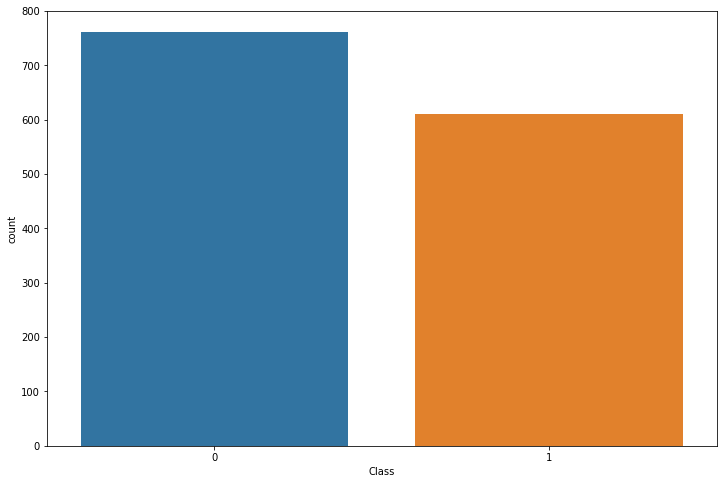

In [5]:
plt.figure(figsize = (12, 8))
sns.countplot(x='Class', data = df)   

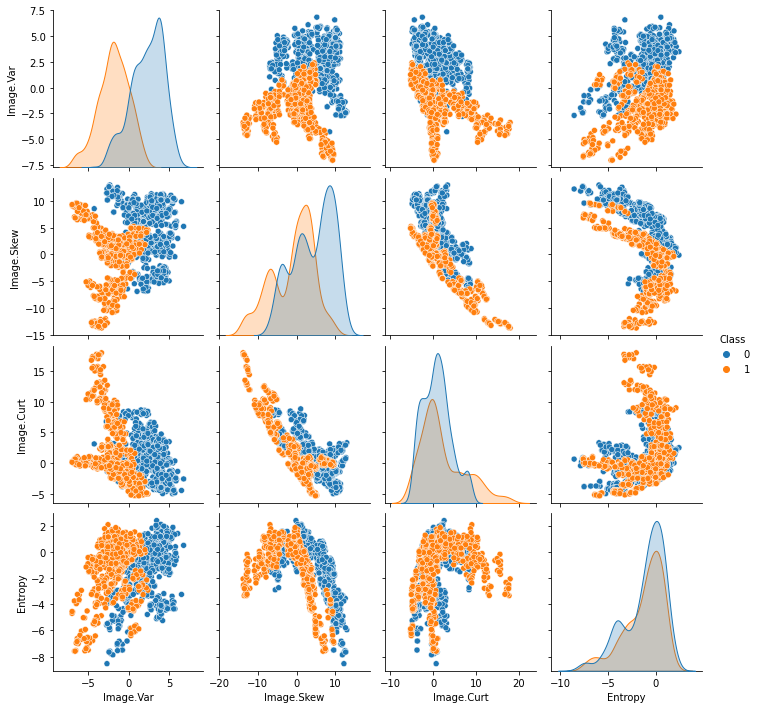

In [6]:
sns.pairplot(df, hue = 'Class')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()  

In [9]:
scaler

StandardScaler()

In [10]:
scaler.fit(df.drop('Class',axis=1))   

StandardScaler()

In [11]:
scaled_features = scaler.fit_transform(df.drop('Class', axis = 1))

In [12]:
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [13]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [14]:
X = df_feat

In [15]:
y = df['Class'] 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
!pip install -U tensorflow==1.13.1
import tensorflow as tf
tf.__version__  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

'1.13.1'

In [19]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [20]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [21]:
feat_cols = [image_var,image_skew,image_curt,entropy]

In [22]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feat_cols)

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

In [24]:
classifier.train(input_fn=input_func,steps=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [25]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [26]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [27]:
note_predictions[0]

{'logits': array([2.8476229], dtype=float32),
 'logistic': array([0.9451957], dtype=float32),
 'probabilities': array([0.05480432, 0.9451957 ], dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object)}

In [28]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,final_preds))

[[247   1]
 [  1 163]]


In [31]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       0.99      0.99      0.99       164

    accuracy                           1.00       412
   macro avg       0.99      0.99      0.99       412
weighted avg       1.00      1.00      1.00       412



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_preds = rfc.predict(X_test)

In [36]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       0.99      1.00      1.00       164

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [37]:
print(confusion_matrix(y_test,rfc_preds))

[[247   1]
 [  0 164]]
